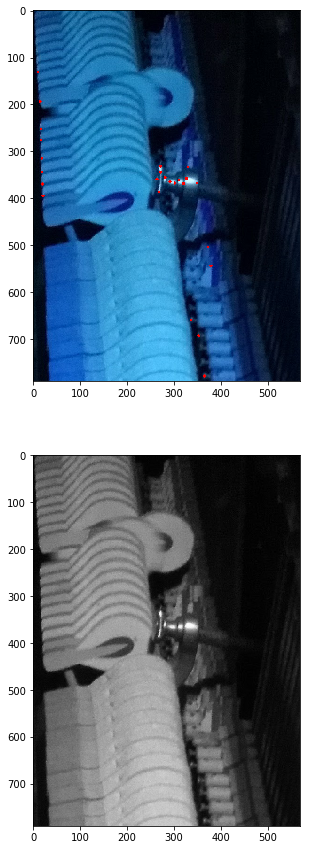

In [81]:
import numpy as np
import cv2

from matplotlib import pyplot as plt

img = cv2.imread('..//Downloads/pianokeys.jpg')
gimg = cv2.imread('..//Downloads/pianokeys.jpg',0)
pkeys = cv2.imread('..//Downloads/pianokeys.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(img,(x,y),3,255,-1)


f,ax=plt.subplots(2,1,figsize=(15,15))
ax[0].imshow(img)

ax[1].imshow(gray,cmap="gray")
#cv.SetImageROI(imag, rect)
plt.show()

In [102]:
from ipywidgets import interact,interactive
import ipywidgets as widgets
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]

smimg = cv2.resize(img,(480,480))

cv2.imshow('dst',smimg)
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()

In [8]:

r = cv2.selectROI("Image", im, fromCenter, showCrosshair)

 Volume in drive C is OS
 Volume Serial Number is 5024-E9AE

 Directory of C:\Users\ed\Downloads

20/10/2018  15:20    <DIR>          .
20/10/2018  15:20    <DIR>          ..
20/10/2018  14:33       662,059,680 Anaconda3-5.3.0-Windows-x86_64.exe
20/10/2018  14:33         1,291,246 IMG_20181020_141500.jpg
20/10/2018  14:33         1,273,874 IMG_20181020_141503.jpg
20/10/2018  14:49        24,520,684 Photos.zip
20/10/2018  14:49         1,520,268 piano.jpg
20/10/2018  15:14       197,633,568 pycharm-community-2018.2.4.exe
20/10/2018  14:33        14,935,084 VID_20181020_141611.mp4
               7 File(s)    903,234,404 bytes
               2 Dir(s)  882,181,718,016 bytes free


In [21]:
cv2.namedWindow("output", cv2.WINDOW_NORMAL)        # Create window with freedom of dimensions
cv2.resizeWindow("output", 400, 600)              # Resize window to specified dimensions
im = cv2.imread("..//Downloads/piano.jpg")                        # Read image
cv2.imshow("output", im)                            # Show image
fromCenter=False
showCrosshair=True
r = cv2.selectROI("output", im, fromCenter, showCrosshair)
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()  

In [ ]:
cv2.namedWindow("ROI", cv2.WINDOW_NORMAL)        # Create window with freedom of dimensions
cv2.resizeWindow("ROI", 400, 600)              # Resize window to specified dimensions
#r = cv2.selectROI("ROI",im)
r = cv2.selectROI("ROI", im, fromCenter, showCrosshair)
# Crop image
imCrop = im[int(r[1]):int(r[1]+r[3]), int(r[0]):int(r[0]+r[2])]

cv2.namedWindow("ROI2", cv2.WINDOW_NORMAL)        # Create window with freedom of dimensions
cv2.resizeWindow("ROI2", 400, 600)              # Resize window to specified dimensions

# Display cropped image
cv2.imshow("ROI2", imCrop)
cv2.waitKey(0)

In [38]:
cv2.imshow('dst',smimg)

In [80]:
uc=pkeys.copy()


# Sketching on images

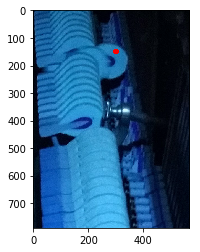

In [46]:
uc=pkeys.copy()
cv2.circle(uc, (300, 150), 10, (255, 0, 0), -1)
plt.imshow(uc,cmap="gray")
plt.show()

# Canny

In [75]:
a = widgets.IntSlider(min=0.0, max=200.0,description='Min:',continuous_update=False,)
b = widgets.IntSlider(min=0.0, max=200.0,description='Max:',continuous_update=False,)

ui = widgets.HBox([a, b])
def canny(a, b):

    edges = cv2.Canny(img,a,b)
    fig=plt.figure(figsize=(10,10))
    plt.subplot(121),plt.imshow(img,cmap = 'gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(edges,cmap = 'gray')
    plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

    plt.show()
    
out = widgets.interactive_output(canny, {'a': a, 'b': b})
display(ui,out)

Output()

# Sobel

In [112]:
la = widgets.IntSlider(min=1, max=15,step=2,description='Min:',continuous_update=False,)
ui = widgets.HBox([la])
def laplace(a):
    ks=a
    laplacian = cv2.Laplacian(gimg,cv2.CV_64F)
    sobelx = cv2.Sobel(gimg,cv2.CV_64F,1,0,ksize=ks)
    sobely = cv2.Sobel(gimg,cv2.CV_64F,0,1,ksize=ks)
    laplacian=sobely
    fig=plt.figure(figsize=(15,10))
    plt.subplot(131),plt.imshow(gimg,cmap = 'gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(132),plt.imshow(abs(sobelx),cmap = 'binary_r')
    plt.title('SobelX Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(133),plt.imshow(abs(sobely),cmap = 'binary_r')
    plt.title('Sobel Y Image'), plt.xticks([]), plt.yticks([])
    plt.show()
#laplace(5)
out = widgets.interactive_output(laplace, {'a': la})

display(ui, out)


Output()

# Laplacian

In [115]:
la = widgets.IntSlider(min=1, max=15,step=2,description='Kernel:',continuous_update=False,)
ui = widgets.HBox([la])
def laplace(a):
    ks=a
    laplacian = cv2.Laplacian(gimg,cv2.CV_64F,ksize=ks)
    sobelx = cv2.Sobel(gimg,cv2.CV_64F,1,0,ksize=ks)
    sobely = cv2.Sobel(gimg,cv2.CV_64F,0,1,ksize=ks)
    laplacian=sobely
    fig=plt.figure(figsize=(15,10))
    plt.subplot(121),plt.imshow(gimg,cmap = 'gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(abs(laplacian),cmap = 'binary_r')
    plt.title('Laplacian Image'), plt.xticks([]), plt.yticks([])

    plt.show()
#laplace(5)
out = widgets.interactive_output(laplace, {'a': la})

display(ui, out)

Output()

# Hough Lines

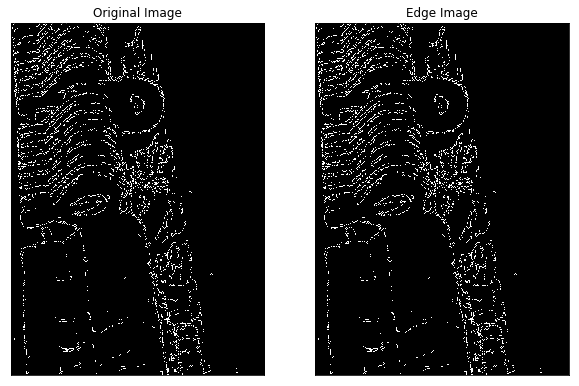

In [68]:
ed=edges.copy()
minLineLength = 20
maxLineGap = 5

lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
for x1,y1,x2,y2 in lines[0]:
    cv2.line(ed,(x1,y1),(x2,y2),(0,255,0),2)
fig=plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(edges,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(ed,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [60]:
a = widgets.IntSlider(min=0.0, max=200.0,)
b = widgets.IntSlider(min=0.0, max=200.0,)

ui = widgets.HBox([a, b])
def f(a, b, c):
    print((a, b, c))

out = widgets.interactive_output(f, {'a': a, 'b': b, 'c': c})

display(ui, out)

Output()

In [66]:
a = widgets.IntSlider(min=0.0, max=200.0,)
b = widgets.IntSlider(min=0.0, max=200.0,)

ui = widgets.HBox([a, b])
def f(a, b):
    ed=edges.copy()
    minLineLength = a
    maxLineGap = b

    lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
    if lines is not None:
        for x1,y1,x2,y2 in lines[0]:
            cv2.line(ed,(x1,y1),(x2,y2),(0,255,0),2)

    plt.subplot(121),plt.imshow(edges,cmap = 'gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(ed,cmap = 'gray')
    plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

    plt.show()
out = widgets.interactive_output(f, {'a': a, 'b': b})

display(ui, out)

Output()

# Intensity Distribution

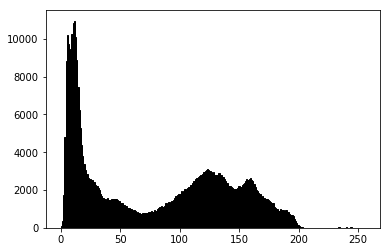

In [118]:
plt.hist(gimg.ravel(), bins=256, range=(0.0, 256.0), fc='k', ec='k')
plt.show()

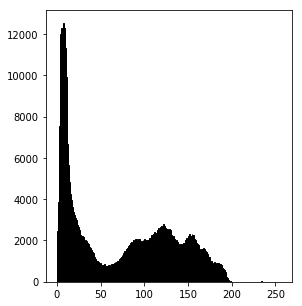

In [131]:
fig=plt.figure(figsize=(15,5))
plt.subplot(131),plt.hist(img[:,:,1].ravel(), bins=256, range=(0.0, 256.0), fc='k', ec='k',color='green')
plt.show()

In [125]:
img[:,:,1]

array([[ 5, 11, 21, ...,  8,  8,  8],
       [13, 10, 17, ...,  5,  4,  3],
       [11,  7, 15, ...,  4,  3,  1],
       ...,
       [21, 21, 21, ..., 12, 10, 12],
       [16, 18, 21, ..., 10, 10, 12],
       [19, 19, 20, ...,  8,  9, 10]], dtype=uint8)

In [55]:
cv2.destroyAllWindows()  

In [ ]:
surf = cv2.SURF(400)